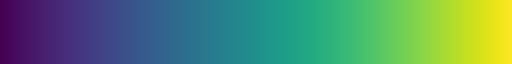

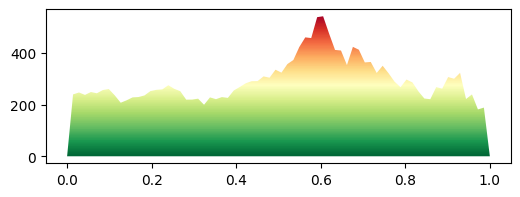

In [151]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import joblib
import plotly.express as px
import plotly as py


x = np.linspace(0, 100, 24*3)
y = np.sin(2*np.pi*x/100)**2

df = pd.read_csv("../data/combined_data.csv")
df = df.iloc[-24*3:]

features = [key for key in df if "wind" in key] + ["month", "hour"]
model = joblib.load("../models/xgb_1708455353.pkl")
co2_predictions = model.predict(df[features])
time_axis = np.linspace(0, 1, len(co2_predictions))

x = time_axis
y = co2_predictions
y[0] = 0
y[-1] = 0

fig, ax = plt.subplots(figsize=(6, 2))
# plot only the outline of the polygon, and capture the result
poly, = ax.fill(x, y, facecolor='none')
# get the extent of the axes
xmin, xmax = ax.get_xlim()
ymin, ymax = ax.get_ylim()
# create a dummy image
img_data = np.arange(ymin, ymax, (ymax-ymin)/100.)
img_data = img_data.reshape(img_data.size, 1)

# plot and clip the image
im = ax.imshow(img_data, aspect='auto', origin='lower', cmap="RdYlGn_r", extent=[
    xmin, xmax, ymin, ymax], vmin=y.min(), vmax=y.max())

im.set_clip_path(poly)

In [158]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import joblib
import plotly.express as px


df = pd.read_csv("../data/combined_data.csv")
df = df.iloc[-24*3:]  # Take last three days of training data

features = [key for key in df if "wind" in key] + ["month", "hour"]
model = joblib.load("../models/xgb_1708455353.pkl")
co2_predictions = model.predict(df[features])
time_axis = df["dt"]

In [174]:
cmap = plt.get_cmap("RdYlGn_r")

y = co2_predictions
x = time_axis
y_scaled = (y-np.min(y))/(np.max(y)-np.min(y))

plotly_colormap = [
    f'rgb{tuple(int(256 * x_) for x_ in cmap(y_)[:-1])}' for y_ in y_scaled]

fig = px.bar(x=x, y=y, color=x,
             color_discrete_sequence=plotly_colormap).update_layout(showlegend=False)

fig.show()

In [137]:
import plotly.express as px
import numpy as np

# Sample data
categories = ['Category A', 'Category B', 'Category C', 'Category D']
values = [25, 40, 30, 50]
values = values/np.max(values)

# Choose a matplotlib colormap
cmap = plt.get_cmap('RdYlGn_r')

# Create a custom colormap using Plotly colors
plotly_colormap = [
    f'rgb{tuple(int(256 * x) for x in cmap(y)[:-1])}' for y in values]

# Create a DataFrame
data = {'Categories': categories, 'Values': values}
df = pd.DataFrame(data)

# Create bar chart with custom colors
fig = px.bar(df, x='Categories', y='Values', color="Categories",
             color_discrete_sequence=plotly_colormap,
             title='Bar Chart with Colormap Colors', labels={'Values': 'Bar Values', 'Categories': 'Categories'})

# Show the plot
fig.show()

ValueError: All arrays must be of the same length

In [122]:
[f'rgb{tuple(int(255*x) for x in cmap(val)[:-1])}' for val in values/np.max(values)]

['rgb(32, 144, 140)',
 'rgb(121, 209, 81)',
 'rgb(34, 167, 132)',
 'rgb(253, 231, 36)']